In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [54]:
ds4_16 = np.load('orgnn_data_4nodes_16.npy',allow_pickle=True)
ds4_24 = np.load('orgnn_data_4nodes_24.npy',allow_pickle=True)
ds2_24 = np.load('orgnn_data_2nodes_24.npy',allow_pickle=True)

ds4_32 = np.load('orgnn_data_4nodes_32_new.npy',allow_pickle=True)
ds2_32 = np.load('orgnn_data_2nodes_32.npy',allow_pickle=True)
ds4_24_2 = np.load('orgnn_data_2nodes_24_2.npy',allow_pickle=True)
ds4_48 = np.load('orgnn_data_4nodes_48.npy',allow_pickle=True)



In [55]:
def R2_bins(ds,bins):
    
    data  = ds[:,0]
    datat = ds[:,1]
    datap = ds[:,2]
    
    bb,edge = np.histogram(data,bins = bins)
    r2_return = np.zeros((bins))
    ptrue_bins =[]
    p_predict_bins=[]
    for i in range(bins): 
        
        edge1 = edge[i]
        edge2 = edge[i+1]
        inds = np.where((data>=edge1) & (data< edge2))[0]
        if (len(inds)>50):
            d_1 = datat[inds]
            d_2 = datap[inds]

            r2_return[i] =  r2_score(d_1,d_2)
            
            ptrue_bins.append(d_1)
            p_predict_bins.append(d_2)
        
    return r2_return,edge,bb
        
# pp4_16,bin_pw,bb = R2_bins(ds4_16,100)
# pp4_24,_,_ = R2_bins(ds4_24,100)
# pp2_24,_,_ = R2_bins(ds2_24,100)
pp4_32,bin_pw,_ = R2_bins(ds4_32,100)
pp2_32,bin_pw,_ = R2_bins(ds2_32,100)
# # pp4_32,_,_ = R2_bins(base4_32,100)
# # pp8_32,_,_ = R2_bins(base8_32,100)
# pp4_24_2 ,_,_= R2_bins(ds4_24_2,100)
# pp4_48 ,_,_= R2_bins(ds4_48,100)

In [21]:
pwbins = (bin_pw[1:] + bin_pw[:-1])/2

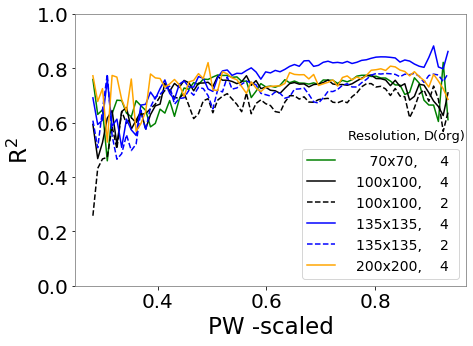

In [56]:
import utils
fn  = 18
fig = plt.figure(figsize=[7,5])
axp = fig.add_subplot(111)

axp.plot(np.array(pwbins)[22:-3], pp4_16[22:-3],color = 'green',label = '     70x70,     4 ')
axp.plot(np.array(pwbins)[22:-3], pp4_24[22:-3],color = 'black',label = '  100x100,    4 ')

axp.plot(np.array(pwbins)[22:-3],pp2_24[22:-3],color = 'black',linestyle = '--',label = '  100x100,    2 ')

axp.plot(np.array(pwbins)[22:-3],pp4_32[22:-3],color = 'blue',label = '  135x135,    4 ')
  
axp.plot(np.array(pwbins)[22:-3],pp2_32[22:-3],color = 'blue',linestyle = '--',label = '  135x135,    2 ')

axp.plot(np.array(pwbins)[22:-3],pp4_48[22:-3],color = 'orange',label = '  200x200,    4 ')





axp.text(0.75,0.54,'Resolution,',fontsize = 13)
axp.text(0.89,0.54,'D(org)',fontsize = 13)
axp.tick_params(axis='y', which='major', labelsize=fn+2)
axp.tick_params(axis='x', which='major', labelsize=fn+2)

axp.set_ylabel(r'R$^2$',fontsize = fn+5)
axp.set_xlabel(r'PW -scaled',fontsize = fn+5)
axp.set_ylim(0,1)


fn = 13
axp.spines['top'].set_color('grey')
axp.spines['left'].set_color('grey')
axp.spines['bottom'].set_color('grey')

axp.spines['right'].set_color('grey')
axp.legend(fontsize = fn+1)
fig.savefig('R2_bin_resolution.pdf',dpi = 300,bbox_inches = 'tight')
plt.show()

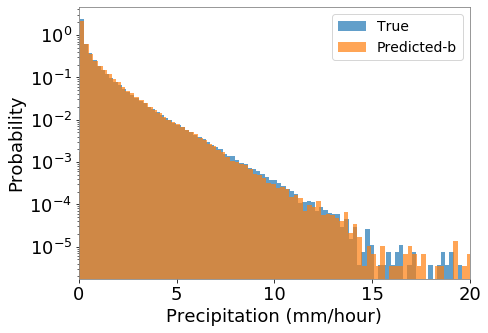

In [16]:
fn = 18

fig = plt.figure(figsize=[7,5])
ax = fig.add_subplot(111)

# _= ax.hist(4*ds4_24[:,1],bins = 100,alpha = 0.7,density = True,label = 'True')
# _= ax.hist(4*ds4_24[:,2],bins = 100,density = True,label = 'Predicted-with org',alpha = 0.7)

_= ax.hist(4*ds4_32[:,1],bins = 100,alpha = 0.7,density = True,label = 'True')
_= ax.hist(4*ds4_32[:,2],bins = 100,density = True,label = 'Predicted-b',alpha = 0.7)
# _= ax.hist(4*base2_24[:,2],bins = 100,density = True,label = 'Predicted-a',alpha = 0.7)

ax.legend(fontsize = 14)
ax.set_ylabel('Probability',fontsize = fn)
ax.set_xlabel('Precipitation (mm/hour)',fontsize = fn)
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=fn)
ax.spines['top'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')

ax.spines['right'].set_color('grey')
# ax.set_ylim(2*10e-7,3.5)
ax.set_xlim(0,20)
fig.savefig('pdf_precip_org_32_4_node_6in_mse_anomaly.pdf',bbox_inches = 'tight',dpi = 300)
plt.show()

In [2]:
import utils
# pp8_32,bin_pw,_ = R2_bins(ds4_32,100)
# pp4_32,_,_ = R2_bins(base4_32,100)
# pp8_32,_,_ = R2_bins(base8_32,100)
fn = 16
avg_pw_lg,avg_pred_lg,std_pw_lg,std_pred_lg = utils.bin_threshold(ds4_32[:,0],4*ds4_32[:,2],100)
avg_pw,avg_pred_clt,std_pw_clt,std_pred_clt = utils.bin_threshold(ds4_32[:,0],4*ds4_32[:,1],100)



fig = plt.figure(figsize=[7,5])
ax = fig.add_subplot(111)

ax.fill_between(np.array(avg_pw),np.array(avg_pred_clt)-np.array(std_pred_clt),
                 np.array(avg_pred_clt)+np.array(std_pred_clt),alpha = 0.5,color = 'blue')
ax.plot(np.array(avg_pw),avg_pred_clt,color = 'navy',linestyle = ':',label = 'True' ,linewidth=3)
ax.fill_between(np.array(avg_pw),np.array(avg_pred_lg)-np.array(std_pred_lg),
                 np.array(avg_pred_lg)+np.array(std_pred_lg),alpha = 0.5,color='orange')
ax.plot(np.array(avg_pw),avg_pred_lg,color = 'orange',linestyle = '-',label = 'predicted',linewidth=3)

axp  = ax.twinx()
# axp.plot(np.array(pwbins)[22:-1],pp4_32[22:-1],color = 'green',label = 'baseline-4',linestyle = '--')
# axp.plot(np.array(pwbins)[22:-1],pp8_32[22:-1],color = 'green',label = 'baseline-8',linestyle = ':')
axp.plot(np.array(pwbins)[22:-1],pp8_32_org[22:-1],color = 'green',label = 'Org-NN',linestyle = '-')
axp.tick_params(axis='y', which='major', labelsize=fn+2,colors = 'green')
axp.set_ylabel(r'R$^2$',fontsize = fn+5,color = 'green')
axp.set_ylim(0,1)
axp.spines['right'].set_color('green')

fn = 13
ax.legend(loc = 2,fontsize =fn+2)
ax.set_ylabel('Precipitation',fontsize = fn+5)

ax.set_xlabel('PW-scaled',fontsize = fn+5)
ax.set_xlim()
plt.xlim(0.3,0.96)
# plt.ylim(0.,3.5)
# axp.legend(loc = 3,fontsize =fn)
ax.tick_params(axis='both', which='major', labelsize=fn+2)

ax.spines['top'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')

ax.spines['right'].set_color('grey')
fig.savefig('org_4node_32_6in_new_anomaly.pdf',dpi = 300,bbox_inches = 'tight')
# fig.savefig('baseline_new_4in_32.pdf',dpi = 300,bbox_inches = 'tight')
plt.show()